In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import re

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
file = 'NonStdAdd.tsv'
df=pd.read_table(file)
df.insert(0,'id',range(1,len(df)+1))
df.fillna("", inplace=True)
df.iloc[[442]]

,id,Address,Count
442,443,,20


In [3]:
#First we construct simple regex for useful data types, so that we can label all unrecognized substrings as unknowns

#non-generalized postal code
postalCodePattern        = re.compile("\\b([0-9]{4})([1-9]{2})")
#formal MKTS code(s)
preFormedMKTSCodePattern = re.compile("\\b([A-Z]{2}[0-9]+-[0-9]+[A-Z]( ?\(?PT\)?)?)(( ?,? ?)([A-Z]{2}[0-9]+-[0-9]+[A-Z])( ?\(?PT\)?)?)*\\b")
#lot(s) fragment
lotFragPattern           = re.compile("\\b(LOT) ?\(?S?\)? ?:? ?(NO\.? ?)?([0-9]+[A-Z]+( ?\(?PT\)?)?)(( ?,? ?[0-9]+[A-Z])(\(?PT\)?)?)* ?(AND|&)? ?([0-9]+[A-Z]+)?\\b")
#mk(s) fragment - same as lotFrag, except for MK head (deprecated)
#mkFragPattern            = re.compile("\\b((MK) ?\(?S?\)? ?:? ?(NO\.? ?)?[0-9]{2}-[0-9]+[A-Z]+( ?\(?PT\)?)?)(( ?,? ?(MK) ?\(?S?\)? ?:? ?(NO\.? ?)?[0-9]{2}-[0-9]+[A-Z])( ?\(?PT\)?)?)* ?(AND|&)? ?([0-9]+[A-Z]+)?\\b")
#mk(s) fragment
mkFragPattern            = re.compile("\\b(MK) ?\(?S?\)? ?:? ?(NO\.? ?)?[A-Z]{0,2}[1-9][0-9]?\\b")

In [4]:
match = preFormedMKTSCodePattern.search("MK21-02743W PT,MK21-02464P PT,MK21-02390W PT FOR PART A:  BUILDING WORKS AT HOUGANG N9 C20 (TOTAL: 718 DWELLING UNITS) AT BUANGKOK CRESCENT; AND")
print(match.group())

MK21-02743W PT,MK21-02464P PT,MK21-02390W PT


In [5]:
def matchtype(bag):
    
    preFormedMKTSCode_match = preFormedMKTSCodePattern.search(bag)
    if(preFormedMKTSCode_match!=None):
        #return 'pre:' + preFormedMKTSCode_match.group()
        return 'preformed'
    
    postalCode_match = postalCodePattern.search(bag)
    if(postalCode_match!=None):
        #return 'post:' + postalCode_match.group()
        return 'postal'
    
    mkFrag_match = mkFragPattern.search(bag)
    lotFrag_match = lotFragPattern.search(bag)
    if(mkFrag_match != None):
        if(lotFrag_match!=None):
            #return mkFrag_match.group() + lotFrag_match.group()
            return 'unstruc'
        else:
            #return mkFrag_match.group()
            return 'mk'
    
    if(lotFrag_match!=None):
        #return lotFrag_match.group()
        return 'lot'
    return 'Uncategorized'

In [6]:
print(matchtype("LOT: 02522P MK: 21 FOR PUNGGOL WEST CONTRACT 31 AT PUNGGOL WAY/SUMANG WAY BESIDE SUMANG LRT-CONTRACT NO: D/029/13"))

unstruc


In [7]:
df['type'] = df.apply(lambda row: matchtype(row['Address']), axis=1)

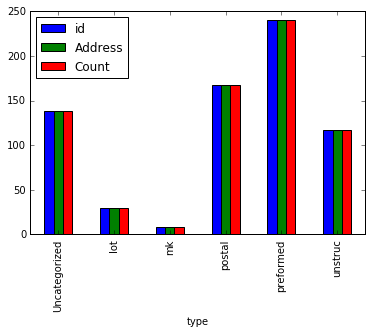

                id  Address  Count
type                              
Uncategorized  138      138    138
lot             30       30     30
mk               8        8      8
postal         167      167    167
preformed      240      240    240
unstruc        117      117    117


In [8]:
typedf = df.groupby('type').count()
typedf.plot(kind='bar')
plt.show()
print(typedf)

['Uncategorized - 19.71 %', 'lot - 4.29 %', 'mk - 1.14 %', 'postal - 23.86 %', 'preformed - 34.29 %', 'unstruc - 16.71 %']


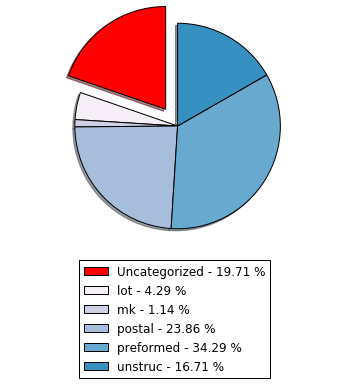

In [9]:
categories = np.char.array(typedf.index.tolist())
sizes = np.array(typedf['Count'].tolist())
colors = ['red', '#f6eff7', '#d0d1e6', "#a6bddb", '#67a9cf', '#3690c0', '#02818a', '#016450']
explode = tuple([0.2]+[0]*5)
percent = 100.*sizes/sizes.sum()
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(categories, percent)]
print(labels)

patches, texts = plt.pie(sizes,explode=explode,colors=colors, shadow=True, startangle=90)

plt.axis('equal')
plt.legend(patches,labels,loc='center', bbox_to_anchor=(0.5, -0.4))
plt.show()

In [12]:
df[df.type == 'Uncategorized']

,id,Address,Count,type
0,1,YIO CHU KANG ROAD SINGAPORE 540000,1,Uncategorized
6,7,SENGKANG TOWN NEIGHBOURHOOD 2 CONTRACT 37 SING...,1,Uncategorized
8,9,"PUNGGOL ROAD, (PUNGGOL EAST C19), (CONTRACT NO...",1,Uncategorized
9,10,PUNGGOL EAST CONTRACT 18 CONTRACT NO: D/077/08...,1,Uncategorized
10,11,PIONEER ROAD SINGAPORE 620000,1,Uncategorized
12,13,NE5C SELETAR COASTAL AREA,1,Uncategorized
13,14,NE13C SELETAR COASTAL AREA,1,Uncategorized
22,23,MARINA BARRAGE SINGAPORE 010000,1,Uncategorized
39,40,"LOT: 22 MK: 8035K,8036N,8037X & 9360M HOUGANG ...",1,Uncategorized
64,65,"LOT: 0 MK: 0 WOODLANDS NEIGHBOURHOOD 1, CONTRA...",1,Uncategorized
